In [2]:
try:
   %tensorflow_version only exists in Colab.
   %tensorflow_version 2.x
except Exception:
   pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime as dt


import os,math ,json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image   

Unknown TensorFlow version: only exists in Colab.
Currently selected TF version: 2.x
Available versions:
 * 1.x
 * 2.x


In [3]:
from google.colab import drive
drive.mount('/content/drive/',)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
path= '/content/drive/My Drive/Dataset/Finger_print/'
train_dir = os.path.join(path, 'training_data')
validation_dir = os.path.join(path, 'test_data')

# Directory with our training male pictures
train_male_dir = os.path.join(train_dir, 'male')

# Directory with our training female pictures
train_female_dir = os.path.join(train_dir, 'female')

# Directory with our validation male pictures
validation_male_dir = os.path.join(validation_dir, 'male')

# Directory with our validation female pictures
validation_female_dir = os.path.join(validation_dir, 'female')

num_male_tr = len(os.listdir(train_male_dir))
num_female_tr = len(os.listdir(train_female_dir))

num_male_val = len(os.listdir(validation_male_dir))
num_female_val = len(os.listdir(validation_female_dir))

train_male_fnames = os.listdir(train_male_dir)
train_female_fnames = os.listdir(train_female_dir)
x_train = train_male_fnames + train_female_fnames
x_test = os.listdir(validation_male_dir) + os.listdir(validation_female_dir)
y_train = np.array([int(x) for x in ("1 " * 1000).split()] +  [int(x) for x in ("0 " * 1000).split()])
y_test = np.array([int(x) for x in ("1 " * 250).split()] +  [int(x) for x in ("0 " * 230).split()])
print(y_train)
print(y_test)



[1 1 1 ... 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
t = 'training_data'
c_path = path+t+'/'+'male'+'/'
x = os.listdir(c_path)
train_file = [c_path+i for i in x]
#n_train_1 = np.array([np.array(Image.open(fname).convert('L').resize(50,50)) for fname in train_file])
c_path = path+t+'/'+'female'+'/'
x = os.listdir(c_path)
train_file = train_file + [c_path+i for i in x]
#plt.imshow(Image.open(train_file[801]).convert('L'))
n_train = np.array([np.array(Image.open(fname).convert('L').resize((150,150))) for fname in train_file])
#n_train = np.array([n_train_1, n_train_2])
print(n_train.shape)

(2000, 150, 150)


In [0]:
t = 'test_data'
c_path = path+t+'/'+'male'+'/'
x = os.listdir(c_path)
test_file = [c_path+i for i in x]
c_path = path+t+'/'+'female'+'/'
x = os.listdir(c_path)
test_file = test_file+[c_path+i for i in x]
n_test = np.array([np.array(Image.open(fname).convert('L').resize((150,150))) for fname in test_file])

In [8]:
print(n_test.shape)
print(n_train.shape)
test_images = n_test.reshape((480, 150, 150, 1))
train_images = n_train.reshape((2000, 150, 150, 1))
print(test_images.shape)
print(train_images.shape)
train_images, test_images = train_images / 255.0, test_images / 255.0


(480, 150, 150)
(2000, 150, 150)
(480, 150, 150, 1)
(2000, 150, 150, 1)


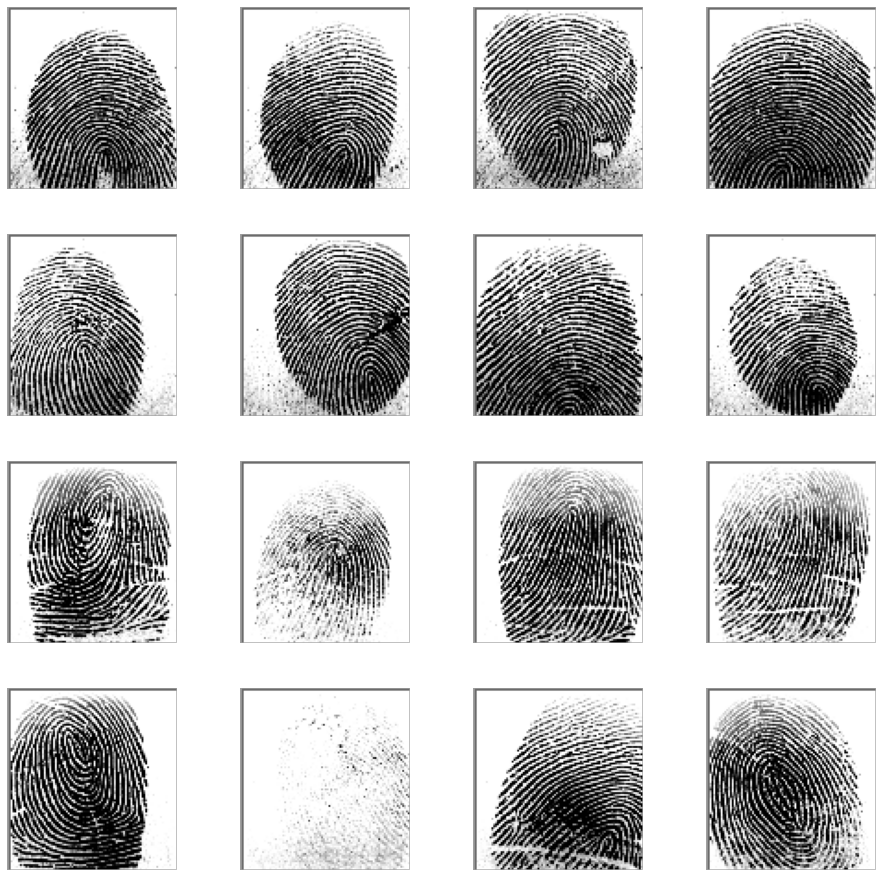

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_male_pix = [os.path.join(train_male_dir, fname) 
                for fname in train_male_fnames[pic_index-8:pic_index]]
next_female_pix = [os.path.join(train_female_dir, fname) 
                for fname in train_female_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_male_pix+next_female_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.optimizers import SGD
model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(512,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images,y_train,epochs=100) 
model.save('final_model.h5')                 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 17, 64)       

In [13]:
from keras.models import load_model
classifierLoad = tf.keras.models.load_model('/content/final_model.h5')
_, acc = model.evaluate(test_images,y_test)
print('>%.3f'%(acc * 100.0))
#scores.append(acc)
#histories.append(history)
#print(scores,histories)
print(model.predict(test_images))

15/15 [==============================] - 0s 5ms/step - loss: 1.8567 - accuracy: 0.6354
>63.542
[[9.99942183e-01 5.78119652e-05]
 [9.99963403e-01 3.66032909e-05]
 [1.94768712e-01 8.05231273e-01]
 [9.99408364e-01 5.91601769e-04]
 [3.44724774e-01 6.55275226e-01]
 [9.97294009e-01 2.70600384e-03]
 [1.40464690e-03 9.98595297e-01]
 [9.99992967e-01 7.08657899e-06]
 [9.98877466e-01 1.12255150e-03]
 [9.94637430e-01 5.36257634e-03]
 [5.39825201e-01 4.60174799e-01]
 [9.99977112e-01 2.29133857e-05]
 [1.29573360e-01 8.70426655e-01]
 [9.99712050e-01 2.87945208e-04]
 [2.62372971e-01 7.37627029e-01]
 [9.99142051e-01 8.57950130e-04]
 [9.01763439e-02 9.09823656e-01]
 [9.67612803e-01 3.23871635e-02]
 [9.87462461e-01 1.25375632e-02]
 [9.62106228e-01 3.78937274e-02]
 [1.28836581e-03 9.98711586e-01]
 [5.62421652e-03 9.94375825e-01]
 [7.16915587e-04 9.99283135e-01]
 [5.05239144e-03 9.94947553e-01]
 [5.42262271e-02 9.45773840e-01]
 [2.66694668e-04 9.99733269e-01]
 [4.29981560e-01 5.70018470e-01]
 [9.01752234e-

In [19]:

	
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True , target_size=(150, 150))
	# convert to array
	img = img_to_array(img)
  
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 150, 150, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_prediction():
	# load the image
	img = load_image('/content/drive/My Drive/Dataset/Finger_print/test_data/female/59__F_Left_index_finger.BMP')
	# load model
	classifierLoad = tf.keras.models.load_model('/content/final_model.h5')
	# predict the class
	predict = model.predict_classes(img)
	if predict == 1:
 		print("male")
	else:
 		print("female")


 
# entry point, run the example
run_prediction()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
female
